In [81]:
import pandas as pd
import numpy as np
from Bio import SeqIO
strains = []
genomes = []
for record in SeqIO.parse('C:/Users/srava/BedfordProjects/zika/results/aligned.fasta', "fasta"):
        strains.append(str(record.id))
        genomes.append(str(record.seq))

In [82]:
dataa = pd.read_csv("DistanceMatrix")

In [83]:
pairwise_distance = dataa.to_numpy()[np.triu_indices(486, k = 1)]

In [84]:
pairwise_distance

array([12., 15., 14., ..., 36., 17., 47.])

In [85]:
dataa_subset = dataa.loc[0:49, 'strain 1':'strain 50']

In [88]:
pairwise_distance_subset = dataa.to_numpy()[np.tril_indices(len(genomes), k = 1)]

In [89]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2,metric='precomputed',perplexity = 25.95)
X_transformed = embedding.fit_transform(dataa)

In [90]:
MDS_df = pd.DataFrame(X_transformed,columns=['cluster ' + str(i) for i in range(1,3)])
print(MDS_df.head())

   cluster 1  cluster 2
0  18.556692  -3.740622
1  18.932138  -3.285227
2  18.630995  -2.810205
3  20.025455  -2.924955
4  20.265968  -2.726339


In [91]:
#merging my final dataframe with their regions and strain names
import pandas as pd
metadata_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\results\metadata.tsv', delimiter='\t')

In [92]:
metadata_df.head()

strain virus accession        date   region           country  \
0  1_0015_PF  zika  KX447511  2014-01-XX  oceania  french_polynesia   
1  1_0016_PF  zika  KX447520  2014-01-XX  oceania  french_polynesia   
2  1_0030_PF  zika  KX447515  2013-11-XX  oceania  french_polynesia   
3  1_0035_PF  zika  KX447514  2014-01-XX  oceania  french_polynesia   
4  1_0038_PF  zika  KX447517  2014-01-XX  oceania  french_polynesia   

           division              city       db segment           authors  \
0  french_polynesia  french_polynesia  genbank  genome  Pettersson et al   
1  french_polynesia  french_polynesia  genbank  genome  Pettersson et al   
2  french_polynesia  french_polynesia  genbank  genome  Pettersson et al   
3  french_polynesia  french_polynesia  genbank  genome  Pettersson et al   
4  french_polynesia  french_polynesia  genbank  genome  Pettersson et al   

                                             url  \
0  https://www.ncbi.nlm.nih.gov/nuccore/KX447511   
1  https://www.ncbi.nlm.nih.gov/nuccore/KX447520   
2  https://www.ncbi.nlm.nih.gov/nuccore/KX447515   
3  https://www.ncbi.nlm.nih.gov/nuccore/KX447514   
4  https://www.ncbi.nlm.nih.gov/nuccore/KX447517   

                                               title  \
0  How Did Zika Virus Emerge in the Pacific Islan...   
1  How Did Zika Virus Emerge in the Pacific Islan...   
2  How Did Zika Virus Emerge in the Pacific Islan...   
3  How Did Zika Virus Emerge in the Pacific Islan...   
4  How Did Zika Virus Emerge in the Pacific Islan...   

                        journal                                     paper_url  
0  MBio 7 (5), e01239-16 (2016)  https://www.ncbi.nlm.nih.gov/pubmed/27729507  
1  MBio 7 (5), e01239-16 (2016)  https://www.ncbi.nlm.nih.gov/pubmed/27729507  
2  MBio 7 (5), e01239-16 (2016)  https://www.ncbi.nlm.nih.gov/pubmed/27729507  
3  MBio 7 (5), e01239-16 (2016)  https://www.ncbi.nlm.nih.gov/pubmed/27729507  
4  MBio 7 (5), e01239-16 (2016)  https://www.ncbi.nlm.nih.gov/pubmed/27729507

In [93]:
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']

In [94]:
result_strains = pd.merge(strains_df,metadata_df, on='strain')

In [95]:
result_strains.head()

strain virus accession        date         region  \
0  DOM/2016/MA_WGS16_024  zika  KY785435  2016-07-07  north_america   
1       DOM/2016/BB_0180  zika  KY014304  2016-04-18  north_america   
2       DOM/2016/BB_0115  zika  KY014321  2016-04-11  north_america   
3       DOM/2016/BB_0208  zika  KY014300  2016-04-20  north_america   
4  DOM/2016/MA_WGS16_007  zika  KY785453  2016-05-10  north_america   

              country            division                city       db  \
0  dominican_republic  dominican_republic  dominican_republic  genbank   
1  dominican_republic  dominican_republic  dominican_republic  genbank   
2  dominican_republic  dominican_republic  dominican_republic  genbank   
3  dominican_republic  dominican_republic  dominican_republic  genbank   
4  dominican_republic  dominican_republic  dominican_republic  genbank   

  segment       authors                                            url  \
0  genome  Metsky et al  https://www.ncbi.nlm.nih.gov/nuccore/KY785435   
1  genome  Metsky et al  https://www.ncbi.nlm.nih.gov/nuccore/KY014304   
2  genome  Metsky et al  https://www.ncbi.nlm.nih.gov/nuccore/KY014321   
3  genome  Metsky et al  https://www.ncbi.nlm.nih.gov/nuccore/KY014300   
4  genome  Metsky et al  https://www.ncbi.nlm.nih.gov/nuccore/KY785453   

                                             title  \
0  Zika virus evolution and spread in the Americas   
1  Zika virus evolution and spread in the Americas   
2  Zika virus evolution and spread in the Americas   
3  Zika virus evolution and spread in the Americas   
4  Zika virus evolution and spread in the Americas   

                             journal  \
0  Nature 546 (7658), 411-415 (2017)   
1  Nature 546 (7658), 411-415 (2017)   
2  Nature 546 (7658), 411-415 (2017)   
3  Nature 546 (7658), 411-415 (2017)   
4  Nature 546 (7658), 411-415 (2017)   

                                      paper_url  
0  https://www.ncbi.nlm.nih.gov/pubmed/28538734  
1  https://www.ncbi.nlm.nih.gov/pubmed/28538734  
2  https://www.ncbi.nlm.nih.gov/pubmed/28538734  
3  https://www.ncbi.nlm.nih.gov/pubmed/28538734  
4  https://www.ncbi.nlm.nih.gov/pubmed/28538734

In [96]:
finalDf = pd.concat([MDS_df, result_strains[['region','country','strain']]], axis = 1)

In [97]:
finalDf

cluster 1  cluster 2         region             country  \
0    18.556692  -3.740622  north_america  dominican_republic   
1    18.932138  -3.285227  north_america  dominican_republic   
2    18.630995  -2.810205  north_america  dominican_republic   
3    20.025455  -2.924955  north_america  dominican_republic   
4    20.265968  -2.726339  north_america  dominican_republic   
5    18.723919  -4.769802    japan_korea               japan   
6    17.461626  -3.577382  north_america  dominican_republic   
7    19.871450  -3.835466  north_america  dominican_republic   
8    17.984722  -3.259269  north_america  dominican_republic   
9    25.983416  -3.314306  north_america  dominican_republic   
10   25.984447  -3.314201  north_america  dominican_republic   
11   17.084887  -7.023367  north_america                usvi   
12   17.050749  -7.509692  north_america                usvi   
13   17.063681  -7.521097  north_america                usvi   
14   17.817818  -4.291624  north_america  dominican_republic   
15   18.405361  -4.111596  north_america               haiti   
16   21.447990  -2.055576  north_america               haiti   
17   18.652302  -5.896848  north_america                 usa   
18   21.595255  -1.443697  north_america          guadeloupe   
19   17.551579  -5.451032  north_america  dominican_republic   
20   17.967499  -4.901023  north_america  dominican_republic   
21   17.116688  -4.347637  north_america  dominican_republic   
22   21.678047  -5.706109  north_america                 usa   
23   21.978800  -5.412440  north_america                 usa   
24   22.304712  -6.383157  north_america                 usa   
25   21.678047  -5.706109  north_america                 usa   
26   22.294691  -5.437406  north_america                 usa   
27   21.355148  -6.237127  north_america                 usa   
28   22.570820  -5.446126  north_america                 usa   
29   23.497118  -5.673425  north_america                 usa   
..         ...        ...            ...                 ...   
489  14.895878  -4.696584  north_america                cuba   
490   2.934823   9.287821  north_america              mexico   
491   2.961335  10.091271  north_america              mexico   
492   3.955553   4.831481  north_america              mexico   
493   1.828581  19.659246  north_america              mexico   
494  15.540651  -7.156684  north_america                usvi   
495   6.957053   9.023587  north_america            honduras   
496  16.607998  -2.706848  north_america  dominican_republic   
497  21.855318  -6.067487  north_america                 usa   
498   3.914825   7.375295  north_america              mexico   
499   0.676332  13.557366  north_america              mexico   
500   4.631100   8.970993  north_america            honduras   
501   5.526749   0.635017  south_america              brazil   
502   5.953069   5.434870  north_america              mexico   
503   6.222013   1.374174  south_america              brazil   
504  21.311432  -5.246102  north_america                 usa   
505  20.389229   1.082568  north_america                 usa   
506  19.984238   0.900168  north_america                 usa   
507  -0.192455  14.835305  north_america              mexico   
508   5.101470   0.152807  south_america              brazil   
509   5.822768   0.702588  south_america              brazil   
510   0.325237   7.471605  north_america                cuba   
511   8.303791 -14.407909  north_america         puerto_rico   
512  17.141476  -1.666517  north_america  dominican_republic   
513   1.467680  14.020163  north_america              mexico   
514   3.817298   9.127051  north_america           nicaragua   
515   3.662064   9.302427  north_america              mexico   
516  21.365963  -4.772934  north_america                 usa   
517  20.901936  -5.045576  north_america                 usa   
518  20.756605  -4.402731  north_america                 usa   

                          strain  
0

In [98]:
#There are 519 strains up until here

In [99]:
import altair as alt
from augur.utils import json_to_tree
import json
import pandas as pd

In [100]:
# Import modules
with open('Data/zika_tree.json') as fh:
    json_tree_handle = json.load(fh)
#json_tree_handle = json.loads(requests.get("http://data.nextstrain.org/zika_tree.json").text)
# Download tree JSON file used by auspice. Despite its filename extension, the data are compressed.
#http = urllib3.PoolManager()
# = http.request('GET', "")


In [101]:
tree = json_to_tree(json_tree_handle)

In [102]:
tree

Clade(branch_length=0, clade=940, name='NODE_0000520', numdate=2007.1438944876675, strain='NODE_0000520', yvalue=510.91459311393555)

In [103]:
node_data = [
    {
        "strain": node.name,
        "date": node.attr["num_date"],
        "y": node.yvalue,
        "region": node.attr["region"],
        "country": node.attr["country"],
        "parent_date": node.parent is not None and node.parent.attr["num_date"] or node.attr["num_date"],
        "parent_y": node.parent is not None and node.parent.yvalue or node.yvalue
    }
    for node in tree.find_clades(terminal=True)
]

In [104]:
node_data[10]

{'strain': 'V20366',
 'date': 2018.7748117727583,
 'y': 507,
 'region': 'south_asia',
 'country': 'india',
 'parent_date': 2018.510007605652,
 'parent_y': 507.5}

In [105]:
node_df = pd.DataFrame(node_data)

In [106]:
node_df.head()
#there are 517 strains here

country         date  parent_date  parent_y          region  \
0  thailand  2013.136893  2010.921473    516.50  southeast_asia   
1  thailand  2016.665298  2010.921473    516.50  southeast_asia   
2  thailand  2015.043806  2010.006479    514.25  southeast_asia   
3  thailand  2016.919918  2011.367398    513.50  southeast_asia   
4  thailand  2013.722793  2011.367398    513.50  southeast_asia   

              strain    y  
0  THA/PLCal_ZV/2013  517  
1           SI_BKK01  516  
2          SV0010/15  515  
3       DMSc05684_16  514  
4         SK403/13AS  513

In [107]:
node_df["y"] = node_df["y"].max() - node_df["y"]

In [108]:
node_df["parent_y"] = node_df["parent_y"].max() - node_df["parent_y"]

In [109]:
node_df.shape

(517, 7)

In [110]:
node_df.head()

country         date  parent_date  parent_y          region  \
0  thailand  2013.136893  2010.921473      0.00  southeast_asia   
1  thailand  2016.665298  2010.921473      0.00  southeast_asia   
2  thailand  2015.043806  2010.006479      2.25  southeast_asia   
3  thailand  2016.919918  2011.367398      3.00  southeast_asia   
4  thailand  2013.722793  2011.367398      3.00  southeast_asia   

              strain  y  
0  THA/PLCal_ZV/2013  0  
1           SI_BKK01  1  
2          SV0010/15  2  
3       DMSc05684_16  3  
4         SK403/13AS  4

In [111]:
node_df["region"].unique()

array(['southeast_asia', 'south_asia', 'oceania', 'china',
       'north_america', 'south_america', 'japan_korea'], dtype=object)

In [112]:
finalDf["region"].unique()

array(['north_america', 'japan_korea', 'south_america', 'oceania',
       'china', 'southeast_asia', 'south_asia'], dtype=object)

In [113]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

In [114]:
merged_df
#this has 485 strains

cluster 1  cluster 2         region           country_x  \
0    18.556692  -3.740622  north_america  dominican_republic   
1    18.932138  -3.285227  north_america  dominican_republic   
2    18.630995  -2.810205  north_america  dominican_republic   
3    20.025455  -2.924955  north_america  dominican_republic   
4    20.265968  -2.726339  north_america  dominican_republic   
5    18.723919  -4.769802    japan_korea               japan   
6    17.461626  -3.577382  north_america  dominican_republic   
7    19.871450  -3.835466  north_america  dominican_republic   
8    17.984722  -3.259269  north_america  dominican_republic   
9    25.983416  -3.314306  north_america  dominican_republic   
10   25.984447  -3.314201  north_america  dominican_republic   
11   17.084887  -7.023367  north_america                usvi   
12   17.050749  -7.509692  north_america                usvi   
13   17.063681  -7.521097  north_america                usvi   
14   17.817818  -4.291624  north_america  dominican_republic   
15   18.405361  -4.111596  north_america               haiti   
16   21.447990  -2.055576  north_america               haiti   
17   18.652302  -5.896848  north_america                 usa   
18   21.595255  -1.443697  north_america          guadeloupe   
19   17.551579  -5.451032  north_america  dominican_republic   
20   17.967499  -4.901023  north_america  dominican_republic   
21   17.116688  -4.347637  north_america  dominican_republic   
22   21.678047  -5.706109  north_america                 usa   
23   21.978800  -5.412440  north_america                 usa   
24   22.304712  -6.383157  north_america                 usa   
25   21.678047  -5.706109  north_america                 usa   
26   22.294691  -5.437406  north_america                 usa   
27   21.355148  -6.237127  north_america                 usa   
28   22.570820  -5.446126  north_america                 usa   
29   23.497118  -5.673425  north_america                 usa   
..         ...        ...            ...                 ...   
456  14.895878  -4.696584  north_america                cuba   
457   2.934823   9.287821  north_america              mexico   
458   2.961335  10.091271  north_america              mexico   
459   3.955553   4.831481  north_america              mexico   
460   1.828581  19.659246  north_america              mexico   
461  15.540651  -7.156684  north_america                usvi   
462   6.957053   9.023587  north_america            honduras   
463  16.607998  -2.706848  north_america  dominican_republic   
464  21.855318  -6.067487  north_america                 usa   
465   3.914825   7.375295  north_america              mexico   
466   0.676332  13.557366  north_america              mexico   
467   4.631100   8.970993  north_america            honduras   
468   5.526749   0.635017  south_america              brazil   
469   5.953069   5.434870  north_america              mexico   
470   6.222013   1.374174  south_america              brazil   
471  21.311432  -5.246102  north_america                 usa   
472  20.389229   1.082568  north_america                 usa   
473  19.984238   0.900168  north_america                 usa   
474  -0.192455  14.835305  north_america              mexico   
475   5.101470   0.152807  south_america              brazil   
476   5.822768   0.702588  south_america              brazil   
477   0.325237   7.471605  north_america                cuba   
478   8.303791 -14.407909  north_america         puerto_rico   
479  17.141476  -1.666517  north_america  dominican_republic   
480   1.467680  14.020163  north_america              mexico   
481   3.817298   9.127051  north_america           nicaragua   
482   3.662064   9.302427  north_america              mexico   
483  21.365963  -4.772934  north_america                 usa   
484  20.901936  -5.045576  north_america                 usa   
485  20.756605  -4.402731  north_america                 usa   

                          strain    

# Pairwise vs. Euclidean distance scatterplot

In [115]:
#change pandas to numpy for euclidean and pairwise
#plot the points and draw the least squares regression line
#print out r
#do it for T-SNE, UMAP, MDS, all of them and add it as a panel to all the graphs
#start putting together a more cohesive github pages to look at all the panels

#make a final project notebook and start putting it together in a cohesive way
#try for flu clades (Color by clade instead of region) and see how it works

In [116]:
#work on making this work

import pandas as pd
import numpy as np
from Bio import SeqIO
strains = []
genomes = []
for record in SeqIO.parse('C:/Users/srava/BedfordProjects/zika/results/aligned.fasta', "fasta"):
        strains.append(str(record.id))
        genomes.append(str(record.seq))

In [117]:
len(strains)
print(len(genomes))

519


In [118]:
strains[:5]

['DOM/2016/MA_WGS16_024',
 'DOM/2016/BB_0180',
 'DOM/2016/BB_0115',
 'DOM/2016/BB_0208',
 'DOM/2016/MA_WGS16_007']

In [119]:
merged_df.head()

cluster 1  cluster 2         region           country_x  \
0  18.556692  -3.740622  north_america  dominican_republic   
1  18.932138  -3.285227  north_america  dominican_republic   
2  18.630995  -2.810205  north_america  dominican_republic   
3  20.025455  -2.924955  north_america  dominican_republic   
4  20.265968  -2.726339  north_america  dominican_republic   

                  strain           country_y         date  parent_date  \
0  DOM/2016/MA_WGS16_024  dominican_republic  2016.517454  2016.177960   
1       DOM/2016/BB_0180  dominican_republic  2016.298426  2015.782991   
2       DOM/2016/BB_0115  dominican_republic  2016.279261  2015.738263   
3       DOM/2016/BB_0208  dominican_republic  2016.303901  2016.145963   
4  DOM/2016/MA_WGS16_007  dominican_republic  2016.358658  2016.145963   

   parent_y    y  
0     202.0  202  
1     188.0  188  
2     171.5  172  
3     205.0  205  
4     205.0  206

In [120]:
#recalculate the pairwise distance here with merged df (add column of genomes and run pairwise distance again)

In [121]:
genomes_df = pd.DataFrame(genomes)
genomes_df.columns = ['genomes']

In [122]:
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']

In [123]:
df_merged = genomes_df.merge(strains_df, how='outer', left_index=True, right_index=True)

In [127]:
merged2_df = df_merged.merge(merged_df, how = 'inner', on = 'strain')
merged2_df = merged2_df[['genomes','strain']]
merged2_df.head()

genomes                 strain
0  NNNNNNNNNNNNNNNNNNNNNNNNNNNAAGCGAAAGCTAGCAACAG...  DOM/2016/MA_WGS16_024
1  GAATCAGACTGCGACAGTTCGAGTTTGAAGCGAAAGCTAGCAACAG...       DOM/2016/BB_0180
2  GAATCAGACTGCGACAGTTCGAGTTTGAAGCGAAAGCTAGCAACAG...       DOM/2016/BB_0115
3  NNATCAGACTGCGACAGTTCGAGTTTGAAGCGAAAGCTAGCAACAG...       DOM/2016/BB_0208
4  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNGCGAAAGCTAGCAACAG...  DOM/2016/MA_WGS16_007

In [128]:
genomes_numpy = merged2_df[['genomes']].to_numpy()
genomes = genomes_numpy.tolist()
genomes = list(genomes_numpy)

In [129]:
# Return the Hamming distance between string1 and string2.
# string1 and string2 should be the same length.
def hamming_distance(array1, array2): 
    # Start with a distance of zero, and count up
    distance = 0
    # Loop over the indices of the string
    L = len(array1)
    for i in range(L):
        # Add 1 to the distance if these two characters are not equal
        if array1[i] != array2[i] and array1[i] != 'N' and array2[i] != 'N':
            distance += 1
    # Return the final count of differences
    return distance

In [136]:
#Using the Hamming distance to create a similarity matrix
numbers = []
matrixOfNum = []
for i in merged2_df.index:
    for j in merged2_df.index:
        num = hamming_distance(merged2_df['genomes'][i],merged2_df['genomes'][j])
        numbers.append(num)
    matrixOfNum.append(numbers)
    numbers = []
dataa = pd.DataFrame(matrixOfNum, columns = ["strain " + str(i) for i in range(1,len(matrixOfNum) + 1)], dtype="float")
print(dataa)

     strain 1  strain 2  strain 3  strain 4  strain 5  strain 6  strain 7  \
0         0.0      12.0      15.0      14.0      19.0      13.0      12.0   
1        12.0       0.0      15.0      14.0      18.0      13.0      11.0   
2        15.0      15.0       0.0      17.0      21.0      16.0      14.0   
3        14.0      14.0      17.0       0.0       8.0      15.0      13.0   
4        19.0      18.0      21.0       8.0       0.0      20.0      19.0   
5        13.0      13.0      16.0      15.0      20.0       0.0      13.0   
6        12.0      11.0      14.0      13.0      19.0      13.0       0.0   
7        13.0      12.0      15.0      12.0      18.0      14.0      13.0   
8        13.0      12.0      15.0      14.0      20.0      14.0      13.0   
9        18.0      19.0      22.0      21.0      27.0      21.0      19.0   
10       18.0      19.0      22.0      21.0      27.0      21.0      19.0   
11       15.0      15.0      16.0      16.0      20.0      16.0      14.0   

In [137]:
dataa.shape

(486, 486)

In [139]:
import numpy as np
pairwise_distance_array = np.array(dataa)[np.triu_indices(486, k = 1)]

In [140]:
len(pairwise_distance_array)

117855

In [141]:
pairwise_df = pd.DataFrame(pairwise_distance_array)

In [142]:
from scipy.spatial.distance import squareform, pdist
euclidean_distance_array = pdist(merged_df[['cluster 1','cluster 2']])

In [143]:
euclidean_distance_array

array([0.59020738, 0.93337971, 1.68005306, ..., 0.53819597, 0.71299877,
       0.65906768])

In [144]:
len(euclidean_distance_array)

117855

In [145]:
euclidean_df = pd.DataFrame(euclidean_distance_array)

In [146]:
final_df = pairwise_df.merge(euclidean_df,how='inner',left_index=True, right_index=True)

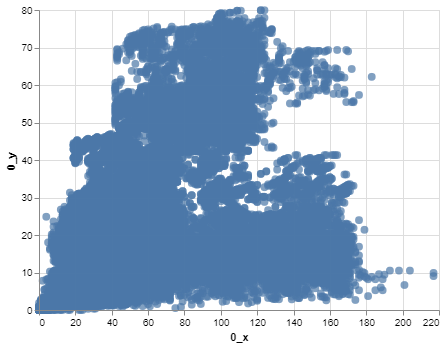

In [148]:
import altair as alt
alt.data_transformers.disable_max_rows()
alt.Chart(final_df).mark_circle(size=60).encode(
    x='0_x',
    y='0_y',
    tooltip=['0_x', '0_y']
)
